<h1> <center> Machine Learning in Risk and Finance </h1>
<h3> <center> Developing a Residual Value Risk Model </h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## <a id='toc1_'></a>About this Course

Course outline

  
- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
- 2. [What is Machine Learning?](#toc2_)    
- 3. [Application of Machine Learning in Risk Management](#toc3_)    
  - 3.1. [Why Use Machine Learning?](#toc3_1_)    
  - 3.2. [A real-world use case: Residual Value Risk Modeling](#toc3_2_)    
- 4. [Developing a Machine Learning Model](#toc4_)    
  - 4.1. [Understanding the Problem](#toc4_1_)    
  - 4.2. [Data Preprocessing](#toc4_2_)    
    - 4.2.1. [Data Cleaning](#toc4_2_1_)    
    - 4.2.2. [Train-Test Split](#toc4_2_2_)    
    - 4.2.3. [Handling Missing Values](#toc4_2_3_)    
  - 4.3. [Feature Engineering](#toc4_3_)    
    - 4.3.1. [Feature Selection](#toc4_3_1_)    
    - 4.3.2. [Encoding Categorical Variables](#toc4_3_2_)    
  - 4.4. [Model Training](#toc4_4_)    
    - 4.4.1. [Decision Tree](#toc4_4_1_)    
    - 4.4.2. [Random Forest](#toc4_4_2_)    
    - 4.4.3. [Gradient Boosting](#toc4_4_3_)    
  - 4.5. [Model Fine Tuning](#toc4_5_)    
  - 4.6. [Model Evaluation](#toc4_6_)    
  - 4.7. [Model Provisioning](#toc4_7_)
    - 4.7.1. [Streamlit](#toc4_7_1_)   
    - 4.7.2. [FastAPI](#toc4_7_2_)    
 

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>What you will learn

- **Fundamental Concepts**: Overview of ML and its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

- **ML in Risk Modeling**: Application of ML in managing residual value risk in car leasing.

- **Developing a ML Risk Model**: Based on a real-world use case:
    - Problem understanding
    - Data preprocessing
    - Feature selection
    - Model training
    - Model evaluation

- **Commonly Used ML Algorithms**: Overview of Bagging and Boosting methods.

- **Data Splitting Process**: Techniques for splitting data into training and test sets, including sampling strategies like cross-validation.

- **ML Pipeline**: Automate the inference process for applying the ML model.

## <a id='toc2_'></a>What is Machine Learning?

To grasp the definition of Machine Learning (ML), it's helpful to narrow the focus by exploring its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

ML is a subset of AI that focuses on developing algorithms capable of learning from data to make predictions or decisions, while DL is a specialized branch of ML that utilizes neural networks to model complex patterns in large datasets.
<div style="text-align: center;">
    <img src="img/ai_ml_dl.png" alt="AI, ML & DL" width="900" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font><br>
AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making. 

<font color="#20b49c"><b>Machine Learning (ML)</b></font>:<br>
ML is a subset of AI that involves **constructing predictive models from labeled datasets**, enabling systems to make informed decisions based on data. It is categorized into three main types:
- **Supervised Learning**: The model learns from labeled data, where input-output pairs are provided, allowing it to predict outcomes for new, unseen data.
- **Unsupervised Learning**: The model identifies patterns and structures in unlabeled data, discovering hidden relationships without predefined labels.
- **Reinforcement Learning**: The model learns through interactions with an environment, receiving rewards or penalties based on its actions, which guides its decision-making process.

In this course, we will focus specifically on supervised learning, utilizing tree-based regression methods to develop predictive models.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>:<br>
Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

> **Machine Learning** is a subfield of Artificial Intelligence consisting of **mathematical models** that **learn from historical data** to solve narrow p**rediction/classification/decision tasks**.

## <a id='toc3_'></a>Application of Machine Learning in Risk Management

Modern risk management involves the proactive **identification, steering, and mitigation of financial risks and potential losses**. Financial institutions face various risks due to future uncertainties, such as:
- A bank customer defaulting on loan repayment in the future -> **credit risk**
- Uncertainty about future interest rate movements, which can negatively impact profit margins if rates rise -> **interest rate risk**
- The possibility of a natural disaster destroying a building insured by an insurance company -> **natural catastrophe risk**

One of the goals in risk management is to make informed predictions about these future uncertainties based on past observations, i.e. based on correlations in historical data.

### <a id='toc3_1_'></a>Why Use Machine Learning?

Empirical research concerns about (causal) effects of $x$ on $y$. Interpretability matters most.<br>
Business & Industry concern about reliable predictions ($\hat{y}$) of uncertain outcomes. Accuracy matters most.
<div style="text-align: center;">
    <img src="img/prediction.png" alt="Interpretability vs. Accuracy" width="1000" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

| Aspect                | Marginal Effects (Interpretation)              | Prediction (Forecasting)                |
|-----------------------|-----------------------------------------------|-----------------------------------------|
| **Model Fitting**     | Often uses all available data, focusing on unbiased, interpretable coefficients. | Typically uses ML models to improve prediction accuracy, sometimes sacrificing interpretability.       |
| **Variable Selection**| Careful theoretical selection to avoid omitted variable bias.                    | Selection based on predictive performance, may include variables with little theoretical justification. |
| **Assumptions**       | Emphasis on meeting assumptions (linearity, no multicollinearity, homoscedasticity) to ensure valid inference. | Less concern about assumptions if predictive accuracy is high; focus is on generalization. |
| **Evaluation**        | Statistical significance, confidence intervals, p-values of coefficients. | Predictive metrics (RMSE, MAE, accuracy, etc.) on validation/test sets. |
| **Focus**             | Interpretability                                                          | Accuracy |


ML has become an essential tool in **risk management** due to its ability to **uncover non-linear patterns that traditional methods may overlook** and **make more accurate predictions/forecasts** than traditional linear models.

### <a id='toc3_2_'></a>A real-world use case: Residual Value Risk Modeling

In the following, we will work on a real-world use case that **car leasing entities** typically face. It is the risk associated with the **uncertainty of what a leased out car can be resold at** when the car returns to the leasing entity. This asset risk is commonly known as residual value risk.

> **Residual value** is the **estimated value of a vehicle at the end of its lease term**. This value can be predicted via a ML model that is trained on historical remarketing data.

Cars depreciate at different speed.
<div style="text-align: center;">
    <img src="img/rv.png" alt="Car depreciation" width="1200" style="height: auto;"/>
<p><small>Image source: <a href="https://diminishedvalueofgeorgia.com/the-top-10-slowest-depreciating-used-cars-in-the-u-s/">Diminished Value of Georgia</a></small></p>
</div>

**Why do leasing companies care about residual values?**

Leasing companies prioritize residual values because they are essential for **estimating** a vehicle's worth at the end of its lease term, which influences **lease payments**, i.e. the monthly amount they need to charge their customers for using the car. Accurate predictions of residual values help **prevent financial losses when remarketing used vehicles**.

**What determines the residual value of a vehicle?**

The residual value of a vehicle is determined by various factors, including its **condition** (age, mileage, and damage), shifting **customer preferences**, **economic fluctuations**, **market transparency**, advancements in **technology** (like electric vehicles), and **regulatory uncertainties**, making accurate predictions challenging.

## <a id='toc4_'></a>Developing a Machine Learning Model

Developing a ML model involves a multi-step process that is typically organized into pipelines.
<div style="text-align: center;">
    <img src="img/ml_pipelines.png" alt="ML Pipeline" width="1000" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

> **Inference** in ML is the process by which a trained model makes predictions or decisions based on new, unseen data.

### <a id='toc4_1_'></a>Understanding the Problem

Creating a residual value model is a regression task focused on **predicting the future resale price of a vehicle** at the end of its lease term, based on features like vehicle characteristics. The starting point for the model development is **historical resale data** that needs to undergo a thorough cleaning and feature engineering process. We work with used car data for the US market that is freely available on [Kaggle](https://www.kaggle.com/datasets/mdnizamsapiee/vehicles-csv/data).

### <a id='toc4_2_'></a>Data Preprocessing

#### <a id='toc4_2_1_'></a>Data Cleaning

First, we import `pandas` a popular Python library that is designed to work with rectangular data.

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

Then, we read the used car data.

In [2]:
df_uc = pd.read_csv('data/used_car.csv', parse_dates=['posting_date'])

In [3]:
# =================================================================================
# 🚨 Coding Task 🚨
# ❓How many observations (samples) and variables (features) does the dataset have?
# =================================================================================


Next, we will take a first look at the data.

In [4]:
df_uc.sample(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,state,posting_date
278699,7313259079,rochester,4500,2012.00,nissan,sentra,good,4 cylinders,gas,136000.00,automatic,NaN,NaN,sedan,black,ny,2021-04-27
292045,7304249639,cincinnati,0,2016.00,chevrolet,silverado 1500,excellent,8 cylinders,gas,28296.00,automatic,1GCVKREC6GZ146108,4wd,truck,grey,oh,2021-04-09
20490,7306180846,little rock,0,2013.00,ford,expedition,like new,8 cylinders,gas,120926.00,automatic,NaN,4wd,NaN,white,ar,2021-04-13


A short description of each variable can be found [here](data/used_car_dictionary.md).

Then, we take a look at the data types of the features.

> In ML terms, a **feature** is simply an **independent variable** or regressor.

In [5]:
df_uc.dtypes

id                       int64
region                  object
price                    int64
year                   float64
manufacturer            object
model                   object
condition               object
cylinders               object
fuel                    object
odometer               float64
transmission            object
VIN                     object
drive                   object
type                    object
paint_color             object
state                   object
posting_date    datetime64[ns]
dtype: object

Note the following definition of data types:
- `int64`: integer type.
- `float64`: floating point type.
- `object`: generic container for any Python object (here used for string variables)
- `datetime64[ns]`: date and time information with nanosecond precision

The automatic data type conversion of pandas seems to make sense.

Typically, we want to **remove duplicate entries** from the data. If duplicates remain, ML models might give them too much importance, especially if they belong to a certain group. This can result in a biased model that doesn't reflect the actual data properly.

In [6]:
df_uc.drop(columns=['id']).duplicated().sum()

4222

There are 4222 duplicates in our raw data. We keep only the first entry.

In [7]:
# =============================================================================================================================================
# 🚨 Coding Task 🚨
# ❗Drop duplicate rows and keep always the first occurrence of duplicated observations. Drop also the 'id' column as it is not needed anymore.
# =============================================================================================================================================
df_uc =  # Conclude this line with your solution

A common approach to gain initial insights into the variables is by examining their **descriptive statistics**, which can be easily accomplished using the pandas method `describe()`. This method provides a summary statistics helping to **understand the distribution and characteristics of the data**.

In [8]:
# Descriptive stats for integers, floats and datetime
df_uc.describe(exclude=['object'])

,price,year,odometer,posting_date
count,422590.00,421475.00,418324.00,422590
mean,75774.14,2011.23,97993.36,2021-04-23 08:18:04.557609216
min,0.00,1900.00,0.00,2021-04-04 00:00:00
25%,5950.00,2008.00,37531.00,2021-04-17 00:00:00
50%,13988.00,2013.00,85377.00,2021-04-25 00:00:00
75%,26500.00,2017.00,133600.00,2021-05-01 00:00:00
max,3736928711.00,2022.00,10000000.00,2021-05-05 00:00:00
std,12243930.69,9.47,213704.62,NaN


We have identified several outliers in the data:
- maximum `price` of $3,736,928,711 is unreasonably high for a used car.
- maximum `odometer` of 10,000,000 miles is also unrealistic.
- a model `year` of 1900 seems to be another data quality issue.

In the following we remove these outliers.

In [9]:
# 1: Remove samples with a price >= 100000
df_uc = df_uc.loc[df_uc['price']<100000]

# 2: Remove samples with a year < 2000
df_uc = df_uc.loc[df_uc['year']>=2000]

# 3: Remove samples with a odometer > 200000
df_uc = df_uc.loc[df_uc['odometer']<=200000]

In [10]:
# Descriptive stats for strings only
df_uc.describe(include=['object']) 

,region,manufacturer,model,condition,cylinders,fuel,transmission,VIN,drive,type,paint_color,state
count,372280,361468,369065,218465,214072,370244,370764,247417,259796,297770,261213,372280
unique,404,41,23395,6,8,5,3,108744,3,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,ca
freq,3194,60453,7019,106911,83390,310918,293591,261,117001,80398,69925,43164


Looking at `manufacturer`, for example, we see that
- there is used car data from 41 distinct manufacturers
- the most frequent manufacturer is Ford with 60,453 observations

Alternatively, we can visualize the univariate distribution of each variable. To facilitate this, I have provided a convenient function called `plot_univariate()`, which can be found in the [util.py](util.py) module.

In [11]:
from util import plot_univariate

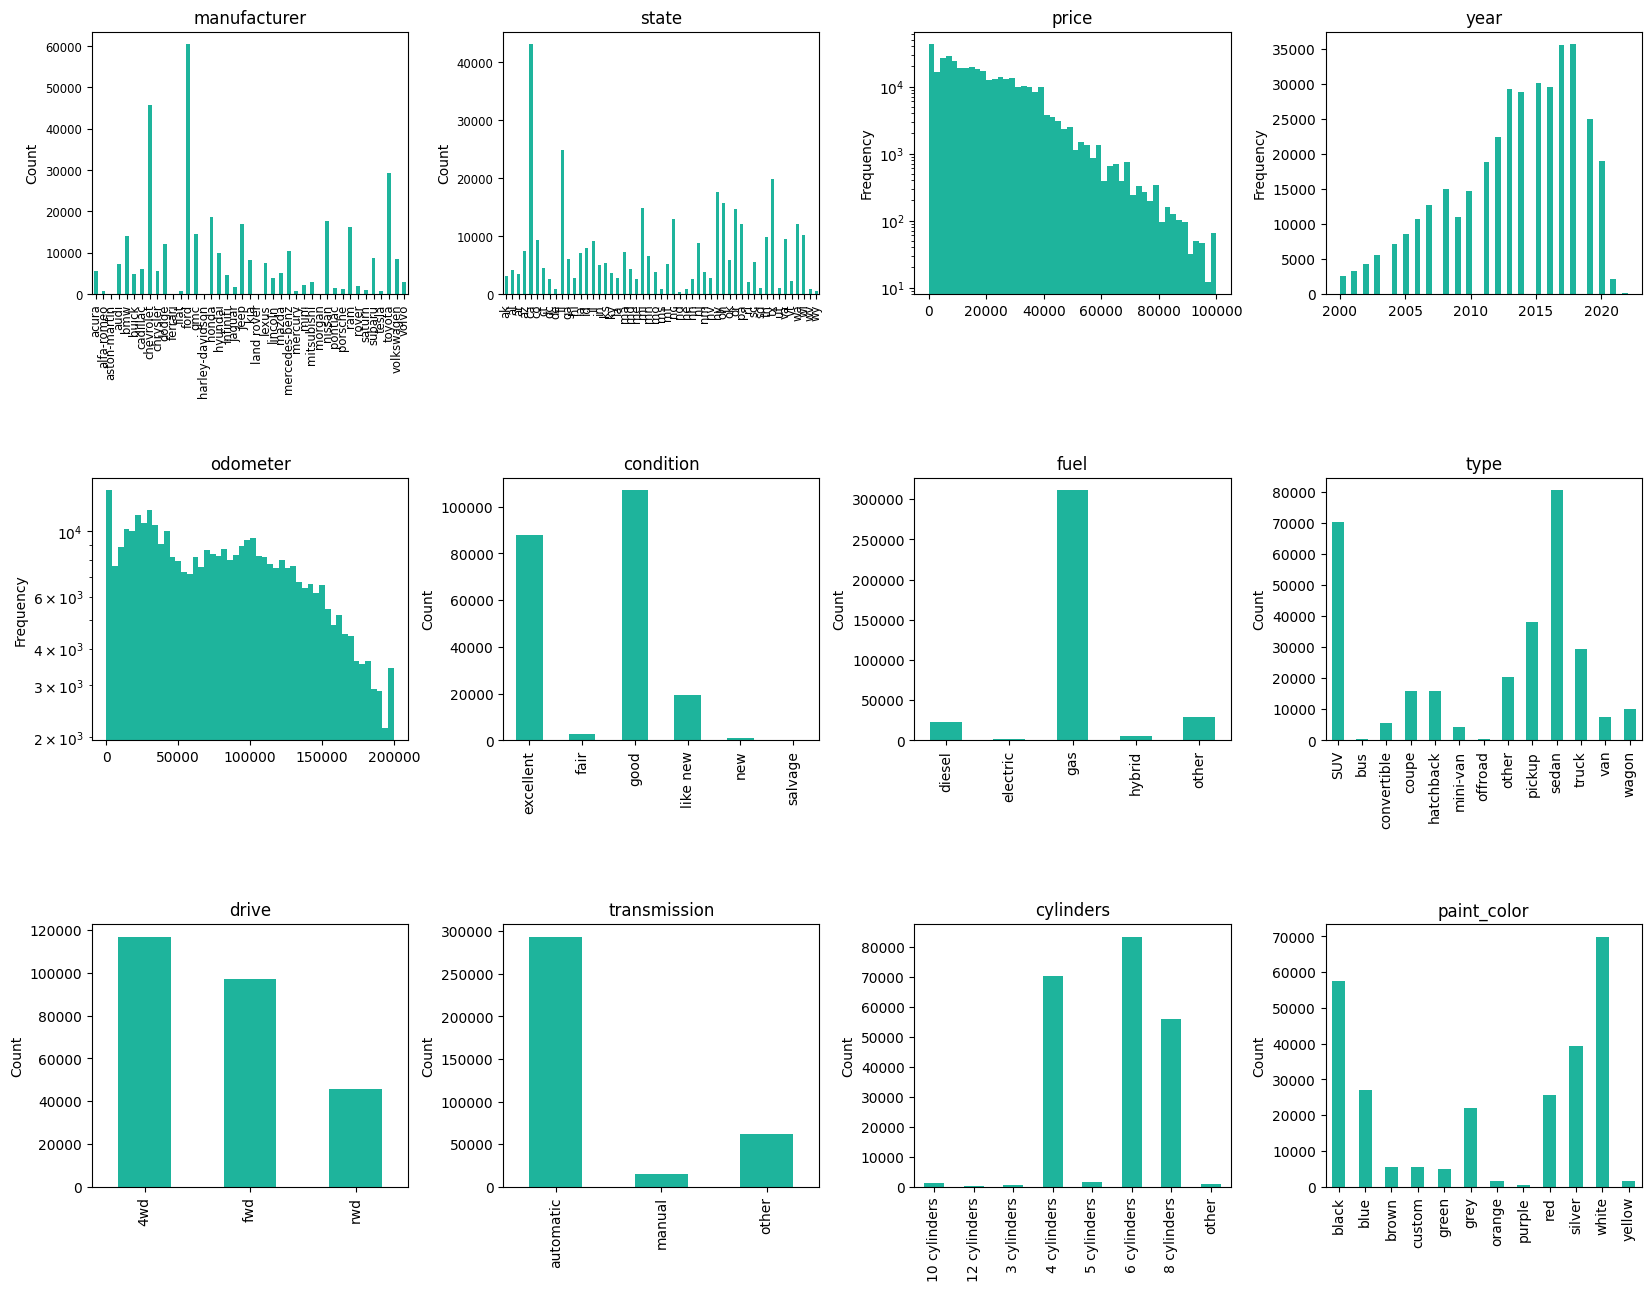

In [12]:
plot_univariate(
    df_uc, 
    columns=[
        'manufacturer', 'state', 'price', 'year', 'odometer', 
        'condition', 'fuel', 'type', 'drive', 'transmission', 
        'cylinders', 'paint_color'], 
    log_dict={'price': True, 'odometer': True},
    ncols=4, size=(20,15), wspace=.3)

The plot indicates that the dataset includes **used car prices from various manufacturers across different states in the US** and model years, with **significant variance in odometer** readings, a key factor in determining a used car's residual value. To refine the analysis, we will remove samples with prices below $1,000, as they are not relevant in the context of residual value assessment.

In [13]:
# =========================================================
# 🚨 Coding Task 🚨
# ❗Remove observations with a used car price below $1000.
# =========================================================
df_uc =  # Conclude this line with your solution

In the context of residual value risk management, we aim to determine whether we can **train a model that accurately predicts the residual value**, or used-car price, **based on vehicle information** available at the *inception* of the lease contract.

Translating these questions into a ML problem can be stated as follows:
- We want to predict vehicles' used car prices which is the **target variable**, $y$ ...
- ... based on information about the vehicle at time of remarketing, referred to as **features**, **$X$** ...
- ... whereas the resulting model needs to fulfill a certain minimum level of **accuracy**, assessed through a scoring function that evaluates the **prediction error**, denoted as, $s\left(\epsilon
\right)$.

In [15]:
df_uc.reset_index(drop=True, inplace=True)

In [16]:
# Target variable
y = df_uc['price']

In [17]:
# Features
X = df_uc.drop(columns=['price'])

#### <a id='toc4_2_2_'></a>Train-Test Split

In ML projects, splitting the dataset into **training** and **test** sets is essential.

**Why Split the Data?**

1. **Model Evaluation**: Train the model on the training set and evaluate its performance on the test set to ensure it generalizes well to new data.
2. **Prevent Overfitting**: Monitor and mitigate overfitting by keeping a separate validation set. Overfitting occurs when a model performs well on training data but poorly on new data. Later in the course, we will learn about cross-validation to further prevent overfitting.

**When to Split the Data?**

- **Early in the Pipeline**: Splitting early ensures data integrity and prevents data leakage, maintaining an unbiased estimate of the model's performance.

We **split the data at random into training and test sets** using the `train_test_split()` method from the popular `scikit-learn` library that provides a wide range of ML algorithms and other convenience functions that are typically used in ML pipelines. We will **keep 20% of the data aside** in the test set. For reproducibility we set a seed via the `random_state` argument.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=333)

#### <a id='toc4_2_3_'></a>Handling Missing Values

Most **machine learning models cannot handle missing values**, so we employ **data imputation to replace these missing values with reasonable substitutes**. This method is preferred over simply dropping samples with missing values, as it preserves more observations and, consequently, more patterns for the model to learn.

In [20]:
X_train.isnull().sum().to_csv('./data/missing_values.csv',header=True)

In [21]:
# =================================================================================================================================
# 🚨 Coding Task 🚨
# ❓Do you have an idea how you could get the number of missing values in the training data for each variable in one line of code?
# =================================================================================================================================


region               0
year                 0
manufacturer      7318
model             2052
condition       101605
cylinders       111645
fuel              1596
odometer             0
transmission      1106
VIN              90758
drive            79997
type             52437
paint_color      74243
state                0
posting_date         0
dtype: int64

Most of the features have missing values. There are different imputation strategies and, depending on the feature, one or the other makes more sense.

##### year

Domain knowledge is crucial for defining an effective imputation approach for vehicle data. The 10th character of the Vehicle Identification Number (VIN) specifically indicates the vehicle's model year. The VIN serves as a unique identifier for each vehicle and is included in our dataset.

<div style="text-align: center;">
    <img src="img/vin.jpg" alt="VIN" width="800" style="height: auto;"/>
<p><small>Image source: Adapted from <a href="https://www.autocheck.com/vehiclehistory/vin-basics">AutoCheck</a></small></p>
</div>

We import a dictionary that maps the 10th digit of the VIN to the model year. The dictionary can be read from the [util.py](util.py) module.

In [22]:
from util import vin_to_year

In [23]:
vin_to_year['M']

2021

In [24]:
X_train.loc[X_train.year.isnull(), 'year'] = X_train.loc[
    X_train.year.isnull()].VIN.apply(lambda x: x[9]).map(vin_to_year)

##### manufacturer

The same applies to the manufacturer. 2nd and 3rd character of the VIN give information about the car manufacturer. Again, we use this information to impute the manufacturer column.

In [25]:
from util import vin_to_manufacturer

In [26]:
vin_to_manufacturer['HG']

'honda'

In [27]:
X_train.loc[
    X_train.manufacturer.isnull() & X_train.VIN.notnull(), 
    'manufacturer'
] = X_train.loc[
    X_train.manufacturer.isnull() & X_train.VIN.notnull()
].VIN.apply(lambda x: x[0:3]).map(vin_to_manufacturer)

##### model

A valid imputation strategy for categorical variables is to introduce a new category labeled "unknown" to replace missing values. We will implement this approach for the model column using the [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class from `scikit-learn`.

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
X_train[['model']] = SimpleImputer(
    strategy='constant', 
    fill_value='unknown').fit_transform(X_train[['model']])

##### paint_color

We can use the [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) again to impute missing values with the most frequent value. We do so for the paint_color variable.

In [30]:
# =================================================================================================================================
# 🚨 Coding Task 🚨
# ❗Replace all missing values in 'paint_color' with the color that occurs most frequently in the training data.
# Hint: Read the documentation of SimpleImputer.
# =================================================================================================================================
X_train[['paint_color']] = # Conclude this line with your solution

##### cylinders, fuel, transmission, drive, type

We impute missing values in cylinders, fuel, transmission, drive, type with the most frequent value conditioned on the `manufacturer` and the vehicle's body `type`. We use the `ConditionalImputer` for this purpose.

In [31]:
from util import ConditionalImputer
from tqdm import tqdm

In [32]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive']

In [33]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer', 'type'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(
        target_col=column, 
        condition_cols=['manufacturer', 'type'], 
        strategy='most_frequent').fit_transform(X_train[relevant_cols])[column]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:45<00:00, 26.48s/it]


In [34]:
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive', 'type']

In [35]:
for column in tqdm(columns_to_impute):
    # Create a list of condition columns excluding the current target column
    relevant_cols = ['manufacturer'] + [column]
    
    # Impute the target column using the adjusted condition columns
    X_train[column] = ConditionalImputer(target_col=column, condition_cols=['manufacturer'], strategy='most_frequent').fit_transform(X_train[relevant_cols])[column]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.73s/it]


##### odometer

An intuitive imputation strategy for the odometer (miles driven) is to assume that **older cars generally have on average a higher mileage**. To implement this, we first calculate the vehicle's age by determining the difference between the model year and the posting date.

In [36]:
X_train['age'] = X_train['posting_date'].dt.year - X_train['year']

We now impute the missing odometer with the most similar used cars in terms of vehicle age. For this purpose, we use `scikit-learn`'s [`KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) class.

In [37]:
from sklearn.impute import KNNImputer

In [38]:
X_train[['age', 'odometer']] = KNNImputer(
    n_neighbors=10).fit_transform(X_train[['age', 'odometer']])

How many missing values are remaining after our imputation efforts?

In [39]:
X_train.isnull().sum()

region               0
year                 0
manufacturer      5379
model                0
condition       101605
cylinders         2287
fuel               104
odometer             0
transmission        14
VIN              90758
drive             2243
type              2058
paint_color          0
state                0
posting_date         0
age                  0
dtype: int64

This means we could lower the number of missing values as follows:

<table>
  <tr>
    <th></th>
    <th>Missing values before imputation</th>
    <th>Missing values after imputation</th>
    <th>Reduction</th>
  </tr>
  <tr>
    <td>manufacturer</td>
    <td>7318</td>
    <td>5379</td>
    <td style="background-color:#d6f5d6;">26%</td>
  </tr>
  <tr>
    <td>model</td>
    <td>2052</td>
    <td>0</td>
    <td style="background-color:#1fc41f;color:white;">100%</td>
  </tr>
  <tr>
    <td>cylinders</td>
    <td>111645</td>
    <td>2287</td>
    <td style="background-color:#2fd32f;color:white;">98%</td>
  </tr>
  <tr>
    <td>fuel</td>
    <td>1596</td>
    <td>104</td>
    <td style="background-color:#4be24b;color:white;">93%</td>
  </tr>
  <tr>
    <td>transmission</td>
    <td>1106</td>
    <td>14</td>
    <td style="background-color:#3ed93e;color:white;">99%</td>
  </tr>
  <tr>
    <td>drive</td>
    <td>79997</td>
    <td>2243</td>
    <td style="background-color:#5be95b;color:white;">97%</td>
  </tr>
  <tr>
    <td>type</td>
    <td>52437</td>
    <td>2058</td>
    <td style="background-color:#6cf06c;color:white;">96%</td>
  </tr>
  <tr>
    <td>paint_color</td>
    <td>74243</td>
    <td>0</td>
    <td style="background-color:#1fc41f;color:white;">100%</td>
  </tr>
</table>


The remaining observations with missing values are going to be dropped.

In [40]:
X_train = X_train.loc[X_train.drop(
    columns=['VIN', 'condition']).notnull().all(axis=1)]
y_train = y_train.loc[X_train.index]

In [41]:
X_train.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition       99758
cylinders           0
fuel                0
odometer            0
transmission        0
VIN             87431
drive               0
type                0
paint_color         0
state               0
posting_date        0
age                 0
dtype: int64

In [42]:
X_train.shape

(260465, 16)

We now have a **clean training data** set with **260,465 complete samples**.

### <a id='toc4_3_'></a>Feature Engineering

#### <a id='toc4_3_1_'></a>Feature Selection

When selecting features for a machine learning model, it's essential to **ensure that the information is available at the time of inference**, particularly in risk management where predictions, such as lease rates based on residual values, must be made at the start of a lease contract without relying on end-of-lease data.

Key considerations:
- The car's sale **region** is unknown at the beginning of the lease contract, so we disregard it unless the off-lease strategy is pre-planned.
- The vehicle's final **condition** is also unknown.
- **Age** and **mileage** can be estimated from the contractual lease period and maximum mileage.

Lease contract.
<div style="text-align: center;">
    <img src="img/lease_contract.png" alt="Lease contract" width="600" style="height: auto;"/>
<p><small>Image source: <a href="https://www.realcartips.com/leasing/0433-sample-lease-contract.shtml">RealCarTips</a></small></p>
</div>

Conclusion: We will exclude 'condition', 'region', 'state', and 'VIN' from our feature set due to their limited predictive value for residual value estimation.

In [43]:
X_train = X_train.drop(columns=['condition', 'region', 'state', 'VIN'])

Further feature engineering involves **creating new features** to enhance the ML model's predictive power. For instance, we have derived the **age** feature from the manufacturing year and the posting date of the used car.

In [44]:
X_train = X_train.drop(columns=['year', 'posting_date'])

**Special equipment**, such as sport packages, often **depreciates faster** than standard vehicles. We can utilize the model variable to determine if a vehicle is a "sports version".

In [45]:
X_train['sport'] = X_train['model'].apply(
    lambda x: 'sport' in x.lower()).astype(int)

In [46]:
X_train = X_train.drop(columns=['model'])

One could consider additional feature engineering steps. For instance, counting how often the same VIN occurs in the data could serve as a proxy for the number of previous owners. However, this is beyond the scope of this course.

#### <a id='toc4_3_2_'></a>Encoding Categorical Variables

Encoding categorical variables is essential before training a machine learning model, as most **ML algorithms require numerical input** and cannot process categorical data directly. Techniques like **one-hot encoding**, which **converts each category into a binary vector**, can be implemented using the ``OneHotEncoder`` class from ``scikit-learn``.

One hot encoding.
<div style="text-align: center;">
    <img src="img/one_hot_encoding.png" alt="One hot encoding" width="700" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
# Step 1: Fit and transform the data
encoder = OneHotEncoder(
    sparse_output=False, 
    min_frequency=5, 
    handle_unknown='infrequent_if_exist').fit(
        X_train[['manufacturer', 'fuel', 'cylinders', 
                 'paint_color', 'type', 'drive', 'transmission']])

# Transform the data
encoded_data = encoder.transform(
    X_train[['manufacturer', 'fuel', 'cylinders', 
             'paint_color', 'type', 'drive', 'transmission']])

In [49]:
# Step 2: Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(
    encoded_data, columns=encoder.get_feature_names_out())

In [50]:
# Step 3: Concatenate the original DataFrame with the encoded DataFrame
X_train = pd.concat([
    X_train.reset_index(drop=True), 
    encoded_df.reset_index(drop=True)], 
    axis=1)

In [51]:
# Step 4: Drop the original categorical columns since no longer needed
X_train.drop(
    columns=['manufacturer', 'fuel', 'cylinders', 
             'paint_color', 'type', 'drive', 'transmission'], 
    inplace=True)

All features are now converted into numerical format.

In [52]:
X_train.head(3)

,odometer,age,sport,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_sedan,type_truck,type_van,type_wagon,drive_4wd,drive_fwd,drive_rwd,transmission_automatic,transmission_manual,transmission_other
0,167655.00,17.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
1,148811.00,7.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
2,71099.00,11.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


### <a id='toc4_4_'></a>Model Training

A crucial step in the development of a ML model is that **different algorithms have varying strengths and weaknesses**, and selecting the most suitable one can significantly impact the model's performance and accuracy.


The number of algorithms for supervised learning tasks for regression is relatively wide spread. A good overview can be found [here](https://scikit-learn.org/stable/supervised_learning.html).

In this course, we focus on **tree-based models**. The basic building block, also known as base learner, in a tree-based model is a **Decision Tree**.

#### <a id='toc4_4_1_'></a>Decision Tree

Decision Tree Logic:

- **Splitting**: The decision tree starts with the entire dataset and repeatedly divides it into smaller groups. At each step, it looks for the feature and the specific value that best separates the data according to the target outcome. This means it tries to split the data so that each group is as pure or homogeneous as possible (i.e. similar prices)
- **Decision Rules**: Every internal node in the tree represents a simple yes/no question based on a feature, such as "Is the car older than 6 years?" Depending on the answer, the data moves down one branch or the other.
- **Leaf Nodes**: When the data can no longer be split effectively, the process stops, and the tree reaches a leaf node. Each leaf node provides the final prediction for any data point that ends up there (i.e. the average price of the samples in that leaf).

> **Decision trees** recursively **split** the **data into subsets** based on feature values, aiming to minimize the variance within each subset, ultimately **predicting outcomes by averaging the target values** in the final leaf nodes.

Start with all training data.
<div style="text-align: center;">
    <img src="img/decision_tree_1.png" alt="Decision Tree 1" width="600" style="height: auto;"/>
</div>

Split training data into two homogenous subgroups.
<div style="text-align: center;">
    <img src="img/decision_tree_2.png" alt="Decision Tree 1" width="800" style="height: auto;"/>
</div>

Split again and calculate average price within groups as predictions.
<div style="text-align: center;">
    <img src="img/decision_tree_3.png" alt="Decision Tree 3" width="820" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

In the following, we train a simple decision tree using `DecisionTreeRegressor` from ``scikit-learn``. With the the arguments `max_depth` and `min_samples_leaf` we control the complexity of the final tree:
- `max_depth`: The maximum number of subsequent binary splits, i.e. how large the tree is allowed to get
- `min_samples_leaf`: The minimum number of samples that need to be in a terminal leaf

In [53]:
from sklearn import tree

In [54]:
model = tree.DecisionTreeRegressor(
    max_depth=2, 
    min_samples_leaf=1000).fit(X_train, y_train)

In [55]:
tree_plot = tree.export_graphviz(
    model,                                # The trained decision tree model to visualize.
    feature_names=X_train.columns,        # Names of the features used in the model for labeling nodes.
    filled=True,                          # Fills the nodes with colors based on the predicted class.
    rounded=True,                         # Draws node boxes with rounded corners for better aesthetics.
    special_characters=True,              # Allows the use of special characters in feature names for proper rendering.
    proportion=True,                      # Displays the proportion of samples at each node instead of absolute counts.
    impurity=False,                       # Omits impurity values (like Gini or entropy) from the node display.
    precision=0                           # Sets the precision for floating-point values to zero for cleaner output.
)

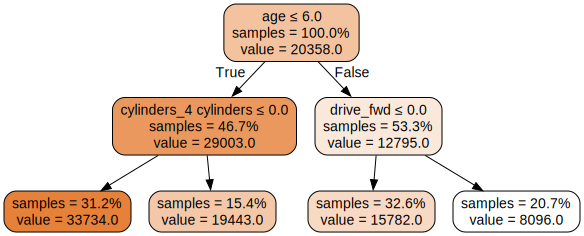

In [56]:
import graphviz

graphviz.Source(tree_plot)

The decision tree visualization shows that training observations are first split based on the vehicle's **age**, with cars **younger than 6 years** moving left and those **older than 6 years** moving right. For vehicles under the age threshold, **4-cylinder engines** average at **\\$19,443**, while other engine types average at **\\$33,734**; for those above the threshold, **front-wheel drive** average at **\\$8,096**, compared to **\\$15,782** for **all-wheel drive**.

Decision trees are considered **weak learners** due to their tendency to **overfit** training data, particularly when they are deep, which can hinder their ability to generalize to unseen data. Conversely, shallow trees, or **stumps**, also exhibit weak learning characteristics as they capture limited information, resulting in high bias and low prediction accuracy.

> **Overfitting** occurs when a ML model learns the training data too well, capturing noise and details that do not generalize to new, unseen data. This results in a model that performs well on training data but poorly on test data.

Overfitting is related to the concepts of variance and bias:

- **High Variance**: Overfitting models have high variance, meaning they are too sensitive to the fluctuations in the training data.
- **Low Bias**: Overfitting models typically have low bias, meaning they fit the training data very closely.

<div style="text-align: center;">
    <img src="img/biasvariance.png" alt="Bias Variance Trade-off" width="600" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

One effective way to visualize a model's performance is by **plotting its predictions against the true values**, which we will demonstrate next. The better the prediction the closer the points are the red diagonal.

In [57]:
from util import plot_predictions

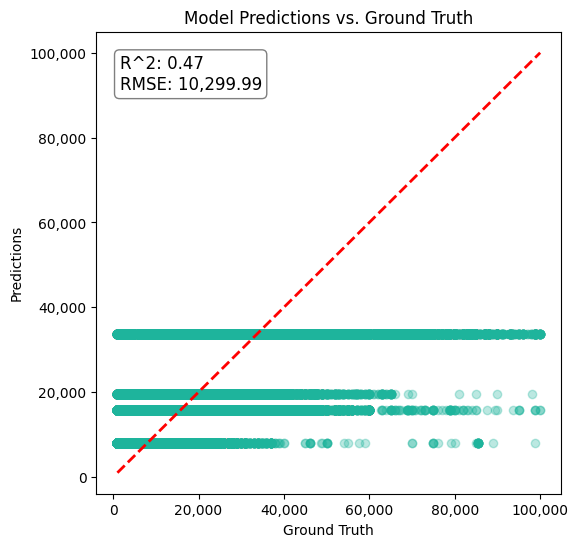

In [58]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

#### <a id='toc4_4_2_'></a>Random Forest

Random Forest logic:

- **Ensemble of Trees**: It builds a large number of decision trees (hence "forest") and merges their results to improve accuracy and control overfitting.
- **Bootstrap Aggregation (Bagging)**: Each tree is trained on a random subset of the training data, sampled with replacement (bootstrapping). This helps in reducing variance.
- **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting, which helps in reducing correlation among the trees and improves model robustness.

A Random Forest is an ensemble of trees.
<div style="text-align: center;">
    <img src="img/random_forest.png" alt="Random Forest" width="1500" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

> A **random forest** is an ensemble learning method that constructs multiple decision trees during training and outputs mean prediction of the individual trees.

We train a Random Forest using `RandomForestRegressor` from `scikit-learn`. We control the training process by means of the following argument:
- `n_estimators`: The number of decision trees
- `max_depth`: The maximum depth of a tree
- `bootstrap`: Whether a random fraction of the samples should be used when training a tree, i.e. bootstrap sampling
- `max_features`: The number of features to consider when looking for the best split in a tree (sqrt(number_features))
- `random_state`: Since `bootstrap` and `max_features` add randomness to the training process, `random_state` sets a seed for reproducibility

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20, 
    bootstrap=True,
    max_features='sqrt',
    random_state=333).fit(X_train, y_train)

Model performance.

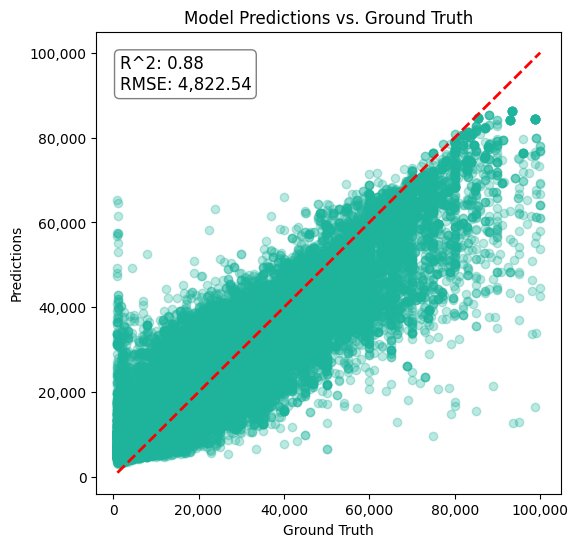

In [61]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

#### <a id='toc4_4_3_'></a>Gradient Boosting

Gradient Boosting logic:

- **Sequential Learning**: Add decision trees one at a time. Each new tree is trained to predict the residual errors (the difference between the actual values and the predictions of the current model) of the combined ensemble of previous trees.
- **Gradient Descent**: The model uses gradient descent to minimize the loss function. The gradients of the loss function with respect to the model's predictions are used to fit the new tree.
- **Update Model**: The predictions of the new tree are added to the ensemble with a certain weight (`learning_rate`), which controls the contribution of each tree.

Each new tree is trained to correct the mistakes (residual errors) made by the combined predictions of all previous trees.
<div style="text-align: center;">
    <img src="img/gradient_boosting.png" alt="Gradient Boosting" width="700" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

> **Gradient Boosting** is a ML technique that builds an ensemble of decision trees sequentially, where each tree attempts to correct the errors of the previous ones by minimizing a loss function using gradient descent.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor 

In [63]:
model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    max_features='sqrt',
    random_state=333).fit(X_train, y_train)

Model performance.

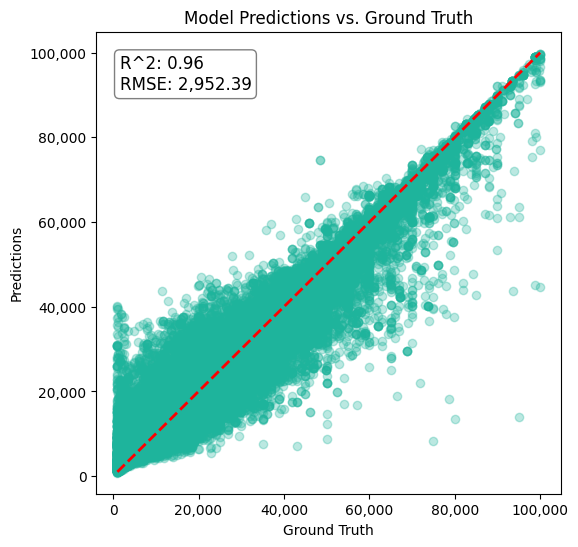

In [64]:
y_pred = model.predict(X_train)
plot_predictions(y_train, y_pred)

### <a id='toc4_5_'></a>Model Fine Tuning

So far, we have arbitrarily **set the hyperparameters** of the ML models **without considering whether these values are optimal for minimizing prediction errors** in estimating vehicles' residual values. Hyperparameters play an important role in determining the effectiveness of the model in achieving its predictive task.

> A **hyperparameter** in a ML model is a parameter whose value is set before the learning process begins. Unlike model parameters, which are learned from the training data, hyperparameters are used to control the learning process and influence the performance of the model.

Here are some key points about hyperparameters:

- **Predefined**: Hyperparameters are set manually before training the model.
- **Model Control**: They control aspects of the training process, such as the learning rate or the complexity of the model.
- **Tuning**: Hyperparameter tuning is the process of finding the optimal values for these parameters to improve model performance.

| Hyperparameters | Decision Tree | Random Forest | Gradient Boosting |
|----------------|---------------|---------------|-------------------|
| `max_depth` | Maximum depth of the tree | Maximum depth of each tree | Maximum depth of each tree |
| `min_samples_split` | Minimum number of samples required to split an internal node | Minimum number of samples required to split an internal node | Minimum number of samples required to split an internal node |
| `min_samples_leaf` | Minimum number of samples required to be at a leaf node | Minimum number of samples required to be at a leaf node | Minimum number of samples required to be at a leaf node |
| `max_features` | Number of features to consider when looking for the best split | Number of features to consider when looking for the best split | Number of features to consider when looking for the best split |
| `criterion` | Function to measure the quality of a split (e.g., `mse`, `mae`) | Function to measure the quality of a split (e.g., `mse`, `mae`) | Loss function to be optimized (e.g., `mse`, `mae`) |
| `splitter` | Strategy used to choose the split at each node (e.g., `best`, `random`) | - | - |
| `n_estimators` | - | Number of trees in the forest | Number of boosting stages to be run |
| `bootstrap` | - | Whether bootstrap samples are used when building trees | - |
| `learning_rate` | - | - | Shrinks the contribution of each tree by `learning_rate` |

| Model parameters      | Decision Tree                                           | Random Forest                                         | Gradient Boosting                                      |
|-----------------------|--------------------------------------------------------|------------------------------------------------------|-------------------------------------------------------|
| splitting features     | Learns the feature that minimizes prediction error in each node    | Learns the feature that minimizes prediction error in each node of all tress  | Learns the feature that minimizes prediction error in each node of all trees    |
| splitting points       | Optimal point for each feature                         | Optimal point for each feature                       | Optimal point for each feature                         |
| leaf node values       | Mean of target values for samples in the leaf          | Mean of target values across all trees               | Weighted sum of target values across all trees         |


Important aspects of fine-tuning ML models:
- **Prevent Overfitting**: The goal is to find hyperparameters that generalize well to unseen data rather than just fitting the training data. **Cross-validation** is essential for assessing model performance on independent datasets and selecting optimal hyperparameters.
- **Computational Efficiency**: Testing all combinations of hyperparameters can be computationally expensive, so methods like **Grid Search** or **Random Search** are used to efficiently approximate the best hyperparameter configuration.

> **Cross-validation** is commonly used for fine-tuning ML models. It helps assessing how the model generalizes to unseen data and aids in selecting the best hyperparameters.

The cross-validation process involves splitting the dataset into k subsets, training the model on k-1 folds while validating it on the remaining fold, and repeating this k times to obtain an average performance metric. 
<div style="text-align: center;">
    <img src="img/cross_validation.png" alt="Cross Validation" width="700" style="height: auto;"/>
<p><small>Image source: Author</small></p>
</div>

> **Grid Search** is a hyperparameter tuning technique that exhaustively searches through a specified subset of hyperparameters to find the optimal combination for a ML model.

> **Random Search** is a hyperparameter tuning technique that randomly samples a specified number of hyperparameter combinations from a given range to find the optimal set for a ML model.

<div style="text-align: center;">
    <img src="img/search.png" alt="Grid and Random Search" width="800" style="height: auto;"/>
<p><small>Image source: Author</small></p>

We will now implement **3-fold cross-validation using a Random Search strategy** to identify the optimal hyperparameters. We will use `RandomizedSearchCV` to do so.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'decision_tree': {
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
    },
    'random_forest': {
        'n_estimators': randint(100, 300),
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
    },
    'gradient_boosting': {
        'n_estimators': randint(100, 300),
        'max_depth': randint(1, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2'],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
    }
}

models = {
    'decision_tree': tree.DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(random_state=333),
    'gradient_boosting': GradientBoostingRegressor(random_state=333),
}

In [66]:
# This step is computationally intensive. Skip or run over night.
results = {}

for model in tqdm(models.keys()):

    # Initialize Random Search
    grid_search = RandomizedSearchCV(
        estimator=models[model],               # The base model to tune
        param_distributions=param_grid[model], # Distribution of hyperparameters to sample from
        n_iter=20,                             # Number of parameter settings sampled (iterations of random search)
        cv=3,                                  # Number of folds for cross-validation to evaluate each setting
        scoring='neg_root_mean_squared_error', # Metric used to evaluate model performance during CV
        return_train_score=True,               # Whether to include training scores in the results
        random_state=333,                      # Seed for reproducibility of random parameter sampling
        n_jobs=-1)                             # Number of parallel jobs to run (-1 uses all available CPUs)

    # Fit Random Search
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    results[model] = grid_search.cv_results_

    print(f"Finished random search for {model}")

 33%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                                                                                                                       | 1/3 [00:27<00:55, 27.96s/it]

Finished random search for decision_tree


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 2/3 [08:30<04:55, 295.18s/it]

Finished random search for random_forest


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [19:29<00:00, 389.88s/it]

Finished random search for gradient_boosting


In [67]:
from util import print_best_models

for model in models:
    print_best_models(results, model)

Model: decision_tree 
Best score: 5745.75 RMSE 
Best parameters: {'max_depth': 17, 'min_samples_leaf': 2} 

Model: random_forest 
Best score: 6457.18 RMSE 
Best parameters: {'bootstrap': False, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 140} 

Model: gradient_boosting 
Best score: 4998.55 RMSE 
Best parameters: {'learning_rate': 0.2, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 251} 



The best performing model is a gradient boosting with an Root Mean Squared Error (RMSE) of $4,998.

The fine-tuned hyperparameters look as follows:

| Hyperparameter        | Optimal value      |
|-----------------------|--------------------|
| `learning_rate`       | 0.2                |
| `max_depth`           | 15                 |
| `max_features`        | 'sqrt'             |
| `min_samples_leaf`    | 8                  |
| `n_estimators`        | 251                |   

### <a id='toc4_6_'></a>Model Evaluation

It is good practice to put all steps of data preprocessing and feature engineering into a pipeline. This encapsulation helps ensure that **all steps are executed in the correct order** not only **on** the **training data** but also on the **test data** **and** later on **production data**. We use the `Pipeline` class from `scikit-learn` for this purpose.

In [68]:
from util import *
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from util import VINReplacer, ConditionalImputer, AgeCalculator, SportColumn, ColumnDropper, DataFrameSimpleImputer 

Data cleaning steps.

In [70]:
pipeline_steps = [    
    # Data Preprocessing
    ('vin_replacer', VINReplacer(
        vin_to_year=vin_to_year, vin_to_manufacturer=vin_to_manufacturer)),
    ('column_transformer_model', ColumnTransformer(
        transformers=[('model_imputer', SimpleImputer(
            strategy='constant', fill_value='unknown'), ['model'])],
        remainder='passthrough',
        verbose_feature_names_out=False,
        force_int_remainder_cols=False).set_output(transform='pandas')
    ),
    ('column_transformer_paint_color', ColumnTransformer(
        transformers=[('paint_color_imputer', SimpleImputer(
            strategy='most_frequent'), ['paint_color'])],
        remainder='passthrough',
        verbose_feature_names_out=False,
        force_int_remainder_cols=False).set_output(transform='pandas')
    ),    
    ('cylinders_imputer', ConditionalImputer(
        target_col='cylinders', condition_cols=['manufacturer', 'type'])),
    ('fuel_imputer', ConditionalImputer(
        target_col='fuel', condition_cols=['manufacturer', 'type'])),
    ('transmission_imputer', ConditionalImputer(
        target_col='transmission', condition_cols=['manufacturer', 'type'])),
    ('drive_imputer', ConditionalImputer(
        target_col='drive', condition_cols=['manufacturer', 'type']))
]

Feature engineering steps.

In [71]:
pipeline_steps.extend([
    # Feature Engineering
    ('age_calculator', AgeCalculator()),
    ('column_transformer_knn', ColumnTransformer(
        transformers=[('knn_imputer', KNNImputer(
            n_neighbors=10), ['age', 'odometer'])],
        remainder='passthrough',
        verbose_feature_names_out=False,
        force_int_remainder_cols=False).set_output(transform='pandas')
    ),
    ('sport_column', SportColumn()),
    ('column_transformer_encoder', ColumnTransformer(
        transformers=[('one_hot_encoder', OneHotEncoder(
            sparse_output=False, min_frequency=5, handle_unknown='infrequent_if_exist'), 
            ['manufacturer', 'fuel', 'cylinders', 
             'paint_color', 'type', 'drive', 'transmission'])],
        remainder='passthrough',
        verbose_feature_names_out=False,
        force_int_remainder_cols=False).set_output(transform='pandas')
    ),
    ('column_dropper', ColumnDropper(
        columns=['VIN', 'year', 'posting_date', 'model'])),
    ('final_simple_imputer', DataFrameSimpleImputer(
        strategy='most_frequent'))
])

Create pipeline object.

In [72]:
pipeline = Pipeline(steps=pipeline_steps)

In [73]:
pipeline

Pipeline(steps=[('vin_replacer',
                 VINReplacer(vin_to_manufacturer={'AA9': 'tr-tec',
                                                  'AAA': 'audi', 'AAK': 'faw',
                                                  'AAM': 'man', 'AAP': '',
                                                  'AAV': 'volkswagen',
                                                  'AAW': 'challenger-trailer',
                                                  'ABJ': 'mitsubishi',
                                                  'ABM': 'bmw',
                                                  'AC5': 'hyundai',
                                                  'ACV': 'isuzu',
                                                  'ADB': 'mercedes-benz',
                                                  'ADD': '',
                                                  'ADM': 'general-motors',
                                                  'ADN': 'nissan',
                                                  'ADR': 'renault',
                                                  'ADX': 'tata', 'AFA': '',
                                                  'AFB': 'maz...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=5,
                                                                sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'cylinders', 'paint_color',
                                                   'type', 'drive',
                                                   'transmission'])],
                                   verbose_feature_names_out=False)),
                ('column_dropper',
                 ColumnDropper(columns=['VIN', 'year', 'posting_date',
                                        'model'])),
                ('final_simple_imputer',
                 DataFrameSimpleImputer(strategy='most_frequent'))])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

In [75]:
X_train = X_train.drop(columns=['region', 'state', 'condition'])

We now apply the pipeline steps to the training data using the `fit()` method.

In [ ]:
# This step is computationally intensive. Skip and run cell after next cell or run over night.
pipeline_fitted = pipeline.fit(X_train)

We now save the trained pipeline on disk for future reference.

In [98]:
import pickle

pickle.dump(pipeline_fitted, open('pipelines/ml_model_pipeline.pkl', 'wb'))

In [79]:
import pickle

pipeline_fitted = pickle.load(open('pipelines/ml_model_pipeline.pkl', 'rb'))

Given the fitted pipeline object, we can then transform both training and test data.

In [80]:
X_train_transformed = pipeline_fitted.transform(X_train)
X_test_transformed = pipeline_fitted.transform(X_test)

W:\teaching\risk_analytics\.venv2\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
W:\teaching\risk_analytics\.venv2\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


For evaluating a ML model, having a **benchmark model** is essential for several reasons:

1. **Baseline Performance**: It provides a reference point to compare the performance of more complex models, helping to determine if they offer significant improvements.

2. **Model Validation**: A benchmark model validates the effectiveness of the ML model; if the ML model doesn't outperform it, it may not be capturing the data patterns effectively.

3. **Simplicity and Interpretability**: Benchmark models are typically simpler and more interpretable, offering insights into data relationships.

4. **Setting Expectations**: They help set realistic performance expectations for more complex models by establishing a target based on the benchmark's performance.

Common benchmark models include:
- **Mean Predictor**: Always predicts the mean of the target variable.
- **Median Predictor**: Always predicts the median of the target variable.
- **Simple Linear Regression**: A basic linear model to capture linear relationships.

In the following, we estimate a linear regression as baseline model.

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train_transformed, y_train)

Model performance.

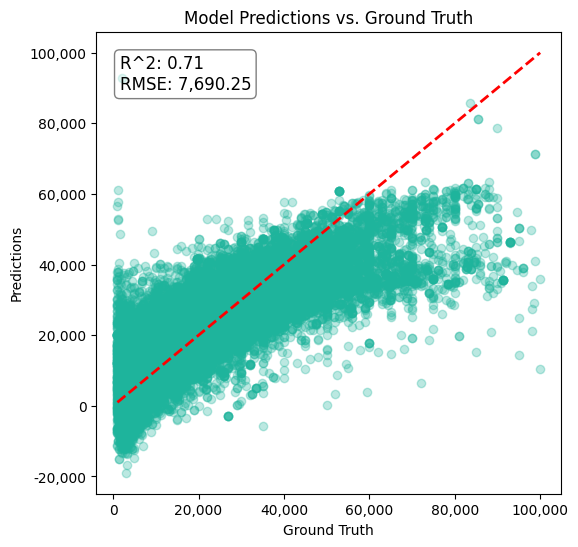

In [82]:
y_pred_benchmark = model.predict(X_test_transformed)
plot_predictions(y_test, y_pred_benchmark)

A linear regression yields a RMSE of $7,690 on the held out test data.

Now we (re-)estimate the best performing gradient boosting model with the fine-tuned hyperparameters and evaulate its out-of-sample performance.

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
model = GradientBoostingRegressor(
    n_estimators=251,
    max_depth=15,
    learning_rate=0.2,
    max_features='sqrt',
    min_samples_leaf=8,
    random_state=333).fit(X_train_transformed, y_train)

Model performance.

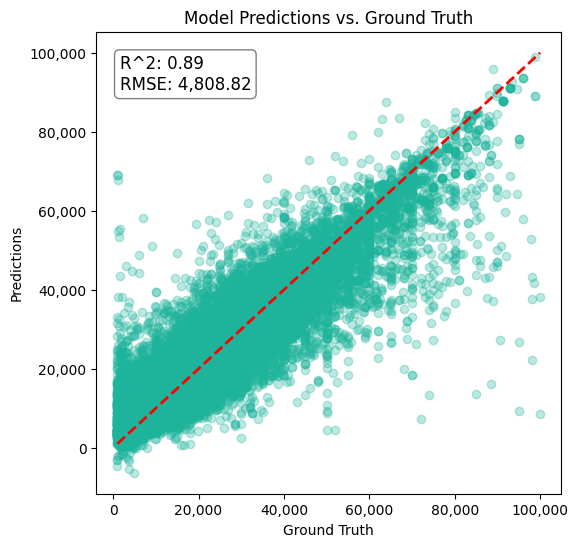

In [85]:
y_pred = model.predict(X_test_transformed)
plot_predictions(y_test, y_pred)

A fine-tuned Gradient Boostung Model yields a RMSE of $4,809 on the held out test data.

Save model in serialized format on disk.

In [89]:
pickle.dump(model, open('models/ml_model.pkl', 'wb'))

### <a id='toc4_7_'></a>Model Provisioning

When we talk about **deploying a model**, we mean **making a trained ML model available for productive use**. This is like putting a finished product on a store shelf so that customers can buy it. While a fully fledged deployment is beyond the scope of this course, we learn two ways how to make our trained model more accesible to users. 

#### <a id='toc4_7_1_'></a>Streamlit

Streamlit is an open-source app framework that simplifies **creating interactive web applications** with minimal effort. It provides a **user-friendly interface for users to input data and interact with the model** in real-time, making it easier to demonstrate the model's capabilities and gather user feedback.

In [ ]:
!streamlit run ml_streamlit.py

Wait for the local server to open in your web browser.

![Streamlit](img/streamlit.gif)

#### <a id='toc4_7_2_'></a>FastAPI

FastAPI streamlines the deployment process by enabling developers to create **APIs** (Application Programming Interfaces), which facilitate communication between different software programs. An API includes an **inference point** where a **trained model is hosted**, allowing **users** to **send input data** and **receive real-time predictions**.

In [88]:
!set PYTHONIOENCODING=utf-8 && fastapi dev ml_fastapi.py

^C


Access the API documentation at [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs).

![FastAPI](img/fastapi.gif)
